## Questions from "data_science_assignment_heart_failure_linear_models.pdf"

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import f as fisher_f

### Question 1.1

In [2]:
heart_failture = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_failture.shape

(299, 13)

In [4]:
heart_failture.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
heart_failture.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df_0 = heart_failture[heart_failture.DEATH_EVENT == 0][['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]

In [11]:
df_1 = heart_failture[heart_failture.DEATH_EVENT == 1][['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]

### Question 1.2

In [18]:
M0 = df_0.corr()
M0

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.043110,-0.002474,-0.012940
serum_creatinine,-0.043110,1.000000,-0.215651,-0.031217
serum_sodium,-0.002474,-0.215651,1.000000,0.001807
platelets,-0.012940,-0.031217,0.001807,1.000000


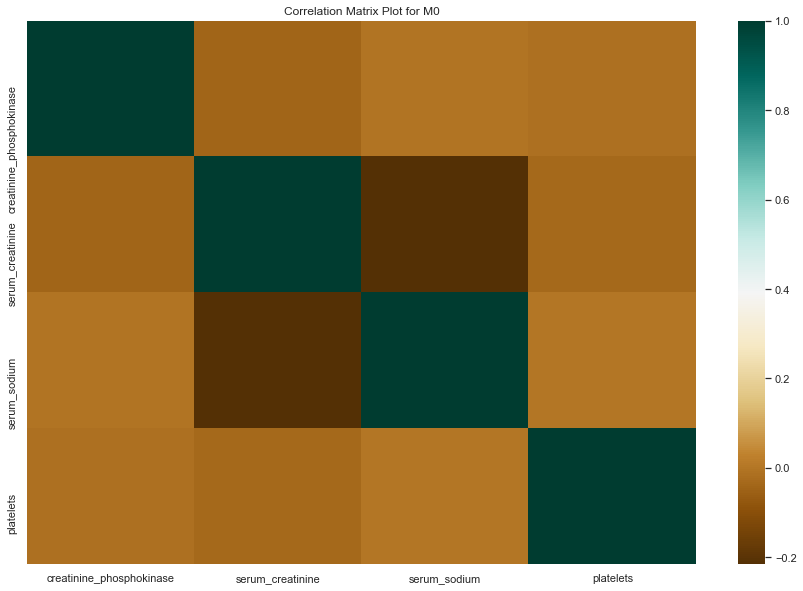

In [39]:
M0_plot, ax = plt.subplots(figsize = (15,10))
sns.heatmap(M0, cmap = "BrBG").set_title("Correlation Matrix Plot for M0")
M0_plot.savefig('M0_plot.png')

In [19]:
M1 = df_1.corr()
M1

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.033407,0.148823,0.078808
serum_creatinine,-0.033407,1.000000,-0.094011,-0.029384
serum_sodium,0.148823,-0.094011,1.000000,0.141284
platelets,0.078808,-0.029384,0.141284,1.000000


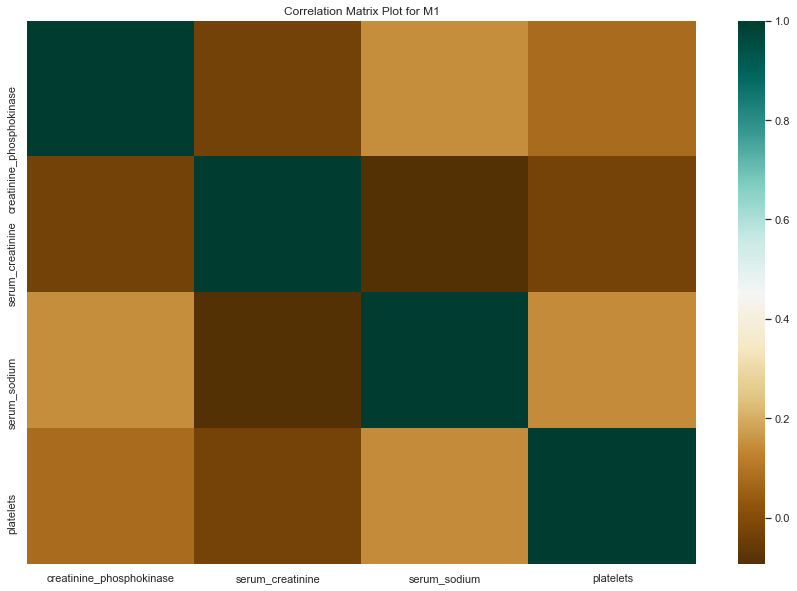

In [40]:
M1_plot, ax = plt.subplots(figsize = (15,10))
sns.heatmap(M1, cmap = "BrBG").set_title("Correlation Matrix Plot for M1")
M1_plot.savefig('M1_plot.png')

### Question 1.3(a)

In [36]:
M0

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.043110,-0.002474,-0.012940
serum_creatinine,-0.043110,1.000000,-0.215651,-0.031217
serum_sodium,-0.002474,-0.215651,1.000000,0.001807
platelets,-0.012940,-0.031217,0.001807,1.000000


serum_sodium and serum_creatinine have the highest correlation for surviving patients. 

### Question 1.3(b)

serum_sodium and platelets have the lowest correlation for surviving patients. 

### Question 1.3(c)

In [41]:
M1

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.033407,0.148823,0.078808
serum_creatinine,-0.033407,1.000000,-0.094011,-0.029384
serum_sodium,0.148823,-0.094011,1.000000,0.141284
platelets,0.078808,-0.029384,0.141284,1.000000


creatinine_phosphokinase and serum_sodium have the highest correlation for deceased patients.

### Question 1.3(d)

serum_creatinine and platelets have the lowest correlation for deceased patients. 

### Question 1.3(e)

No, the results are not the same for both dataframes.

### Question 2

According to the last digit of my student ID, I belong to group 1. So, X is creatinine phosphokinase and Y is platelets. First, we are going to split both dataframes for surviving patients and for the deceased patients into train and test data. 

In [166]:
# split the dataframe for surviving patients
X0 = df_0['creatinine_phosphokinase']
y0 = df_0['platelets']
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.5, random_state = 2021)

In [167]:
# split the dataframe for the deceased patients
X1 = df_1['creatinine_phosphokinase']
y1 = df_1['platelets']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.5, random_state = 2022)

### Question 2.1 (simple linear regression)

Model 1 for the surviving patients. 

In [168]:
### For the surviving patients

# (a)
df_0_model1 = LinearRegression().fit(np.array(X0_train).reshape(-1,1), y0_train)

In [169]:
# (b)
print("The value for 'a' is %.4lf and for 'b' is %.4lf" % (df_0_model1.coef_, df_0_model1.intercept_))

The value for 'a' is -9.5857 and for 'b' is 262284.9937


In [170]:
# (c)
df_0_model1_predicted = df_0_model1.predict(np.array(X0_test).reshape(-1,1))

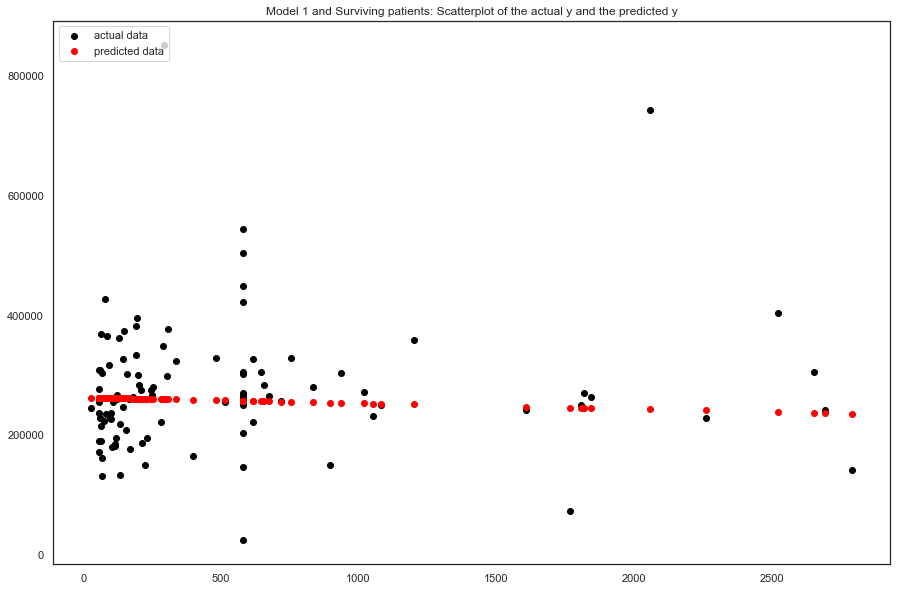

In [171]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X0_test, y0_test, color = 'black', label = 'actual data')
plt.scatter(X0_test, df_0_model1_predicted, color = 'red', label = 'predicted data')
plt.title("Model 1 and Surviving patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [172]:
# (e)
df_0_model1_loss = sum((y0_test-df_0_model1_predicted)**2)
print("The corresponding loss function is %.4lf" % df_0_model1_loss)

The corresponding loss function is 1292865482231.5530


Model 1 for the deceased patients. 

In [173]:
# (a)
df_1_model1 = LinearRegression().fit(np.array(X1_train).reshape(-1,1), y1_train)

In [174]:
# (b)
print("The value for 'a' is %.4lf and for 'b' is %.4lf" % (df_1_model1.coef_, df_1_model1.intercept_))

The value for 'a' is 14.5070 and for 'b' is 230407.4507


In [175]:
# (c)
df_1_model1_predicted = df_1_model1.predict(np.array(X1_test).reshape(-1,1))

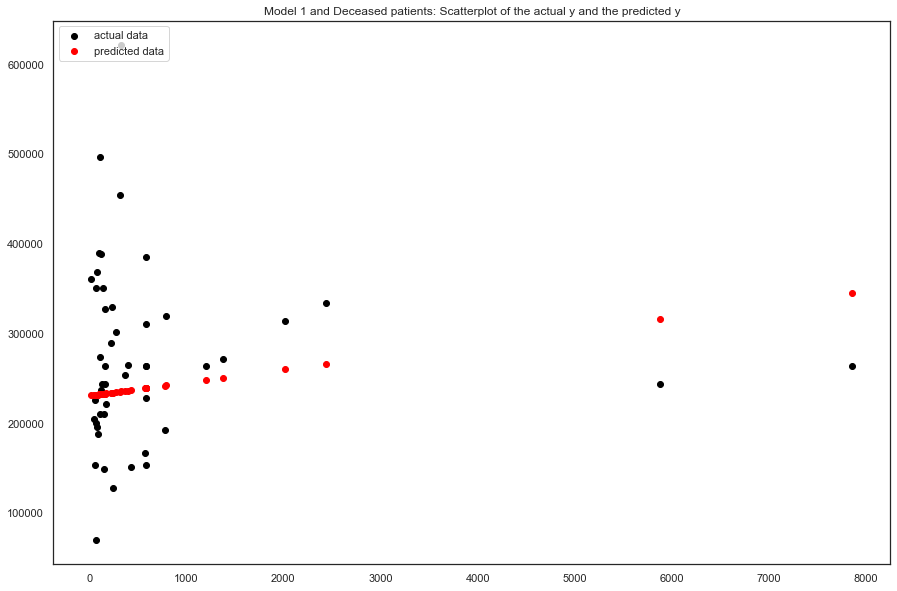

In [176]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X1_test, y1_test, color = 'black', label = 'actual data')
plt.scatter(X1_test, df_1_model1_predicted, color = 'red', label = 'predicted data')
plt.title("Model 1 and Deceased patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [177]:
# (e)
df_1_model1_loss = sum((y1_test-df_1_model1_predicted)**2)
print("The corresponding loss function is %.4lf" % df_1_model1_loss)

The corresponding loss function is 542334440182.3041


Model 2 for surviving patients. 

In [178]:
# (a)
df_0_model2 = LinearRegression().fit(np.column_stack((X0_train**2, X0_train)), y0_train)

In [179]:
# (b)
print("The value for 'a' is %.4lf, 'b' is %.4lf and 'c' is %.4lf" % (df_0_model2.coef_[0], df_0_model2.coef_[1], df_0_model2.intercept_))

The value for 'a' is 0.0076, 'b' is -40.6767 and 'c' is 271746.3429


In [180]:
# (c)
df_0_model2_predicted = df_0_model2.predict(np.column_stack((X0_test**2, X0_test)))

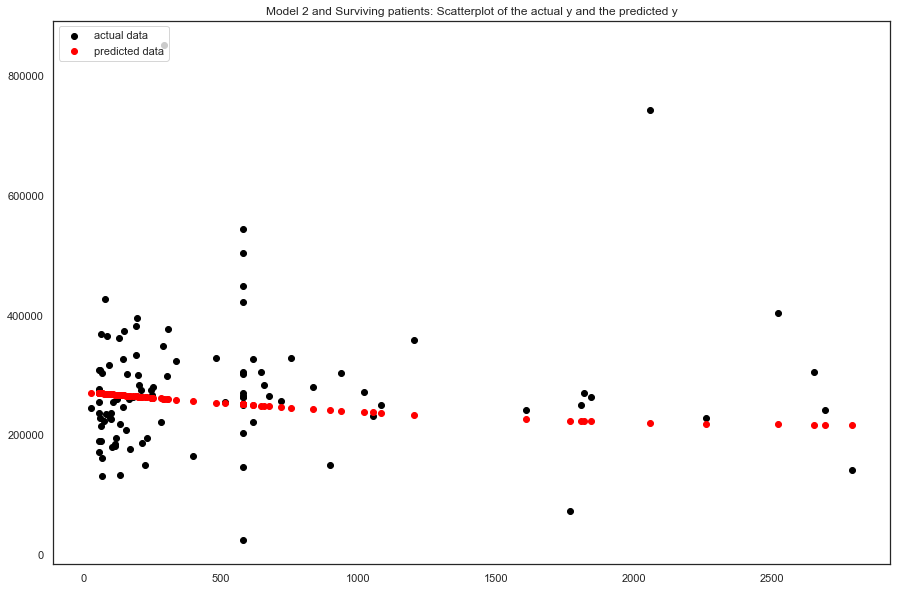

In [181]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X0_test, y0_test, color = 'black', label = 'actual data')
plt.scatter(X0_test, df_0_model2_predicted, color = 'red', label = 'predicted data')
plt.title("Model 2 and Surviving patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [182]:
# (e)
df_0_model2_loss = sum((y0_test-df_0_model2_predicted)**2)
print("The corresponding loss function is %.4lf" % df_0_model2_loss)

The corresponding loss function is 1341597636786.2158


Model 2 for deceased patients

In [183]:
# (a)
df_1_model2 = LinearRegression().fit(np.column_stack((X1_train**2, X1_train)), y1_train)

In [184]:
# (b)
print("The value for 'a' is %.4lf, 'b' is %.4lf and 'c' is %.4lf" % (df_1_model2.coef_[0], df_1_model2.coef_[1], df_1_model2.intercept_))

The value for 'a' is 0.0048, 'b' is -17.9995 and 'c' is 243128.9510


In [185]:
# (c)
df_1_model2_predicted = df_1_model2.predict(np.column_stack((X1_test**2, X1_test)))

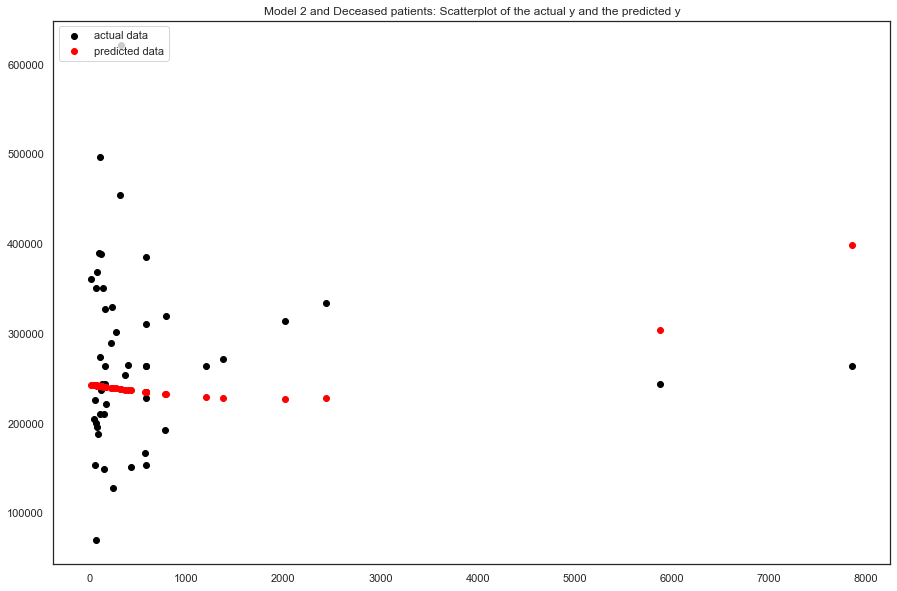

In [186]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X1_test, y1_test, color = 'black', label = 'actual data')
plt.scatter(X1_test, df_1_model2_predicted, color = 'red', label = 'predicted data')
plt.title("Model 2 and Deceased patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [187]:
# (e)
df_1_model2_loss = sum((y1_test-df_1_model2_predicted)**2)
print("The corresponding loss function is %.4lf" % df_1_model2_loss)

The corresponding loss function is 552029732256.2186


Model 3 and Surviving Patients. 

In [188]:
# (a)
df_0_model3 = LinearRegression().fit(np.column_stack((X0_train**3, X0_train**2, X0_train)), y0_train)

In [189]:
# (b)
print("The value for 'a' is %.8lf, 'b' is %.4lf, 'c' is %.4lf and 'd' is %.4lf." % (df_0_model3.coef_[0], df_0_model3.coef_[1], df_0_model3.coef_[2], df_0_model3.intercept_))

The value for 'a' is -0.00000394, 'b' is 0.0331, 'c' is -73.8815 and 'd' is 277884.9847.


In [190]:
# (c)
df_0_model3_predicted = df_0_model3.predict(np.column_stack((X0_test**3, X0_test**2, X0_test)))

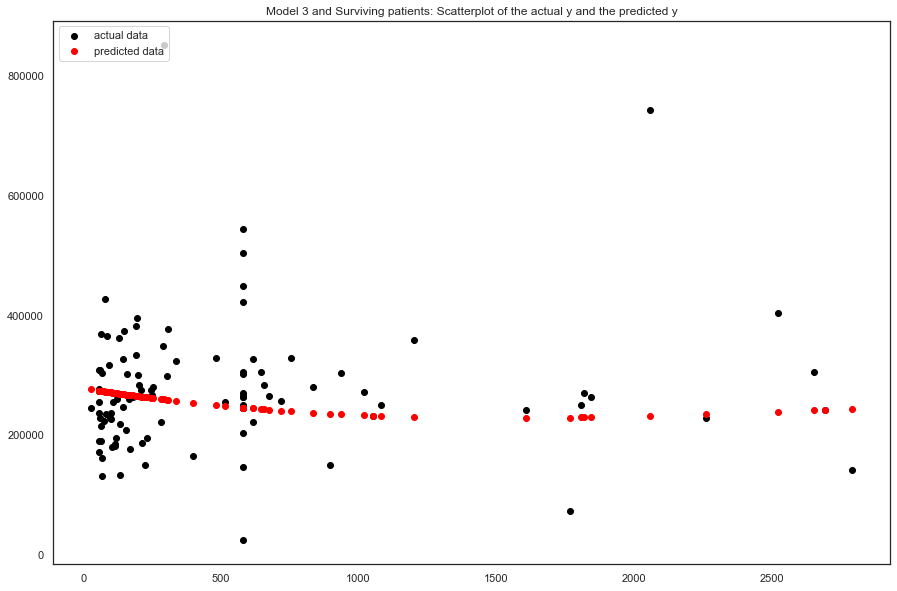

In [191]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X0_test, y0_test, color = 'black', label = 'actual data')
plt.scatter(X0_test, df_0_model3_predicted, color = 'red', label = 'predicted data')
plt.title("Model 3 and Surviving patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [192]:
# (e)
df_0_model3_loss = sum((y0_test-df_0_model3_predicted)**2)
print("The corresponding loss function is %.4lf" % df_0_model3_loss)

The corresponding loss function is 1343323330509.4695


Model 3 and Deceased patients

In [193]:
# (a)
df_1_model3 = LinearRegression().fit(np.column_stack((X1_train**3, X1_train**2, X1_train)), y1_train)

In [194]:
# (b)
print("The value for 'a' is %.8lf, 'b' is %.4lf, 'c' is %.4lf and 'd' is %.4lf." % (df_1_model3.coef_[0], df_1_model3.coef_[1], df_1_model3.coef_[2], df_1_model3.intercept_))

The value for 'a' is 0.00000038, 'b' is 0.0009, 'c' is -10.0716 and 'd' is 240990.0281.


In [195]:
# (c)
df_1_model3_predicted = df_1_model3.predict(np.column_stack((X1_test**3, X1_test**2, X1_test)))

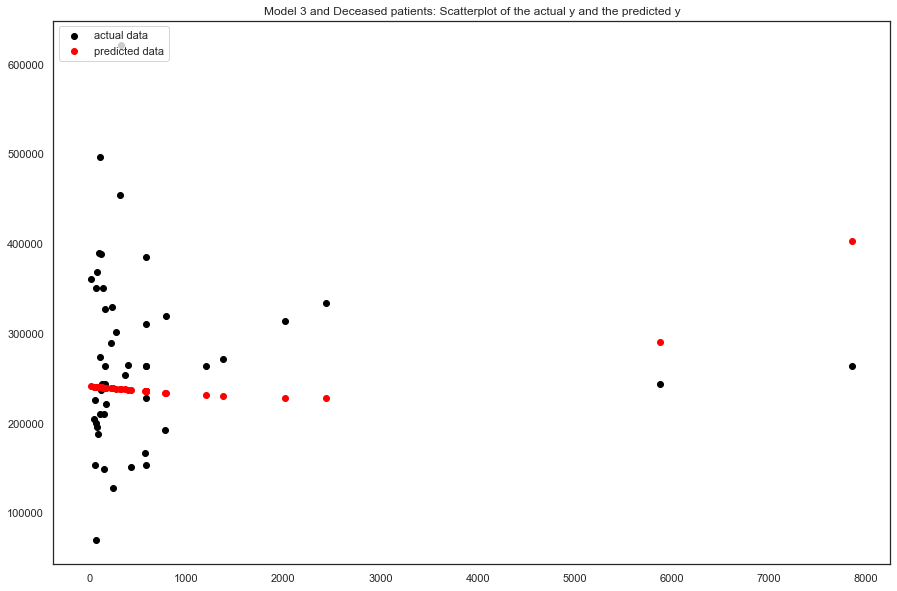

In [196]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X1_test, y1_test, color = 'black', label = 'actual data')
plt.scatter(X1_test, df_1_model3_predicted, color = 'red', label = 'predicted data')
plt.title("Model 3 and Deceased patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [197]:
# (e)
df_1_model3_loss = sum((y1_test-df_1_model3_predicted)**2)
print("The corresponding loss function is %.4lf" % df_1_model3_loss)

The corresponding loss function is 552387274213.1921


Model 4 and Surviving patients.

In [198]:
# (a)
df_0_model4 = LinearRegression().fit(np.array(np.log(X0_train)).reshape(-1,1), y0_train)

In [199]:
# (b)
print("The value for 'a' is %.4lf and 'b' is %.4lf." % (df_0_model4.coef_, df_0_model4.intercept_))

The value for 'a' is -10302.3130 and 'b' is 314988.1418.


In [200]:
# (c)
df_0_model4_predicted = df_0_model4.predict(np.array(np.log(X0_test)).reshape(-1,1))

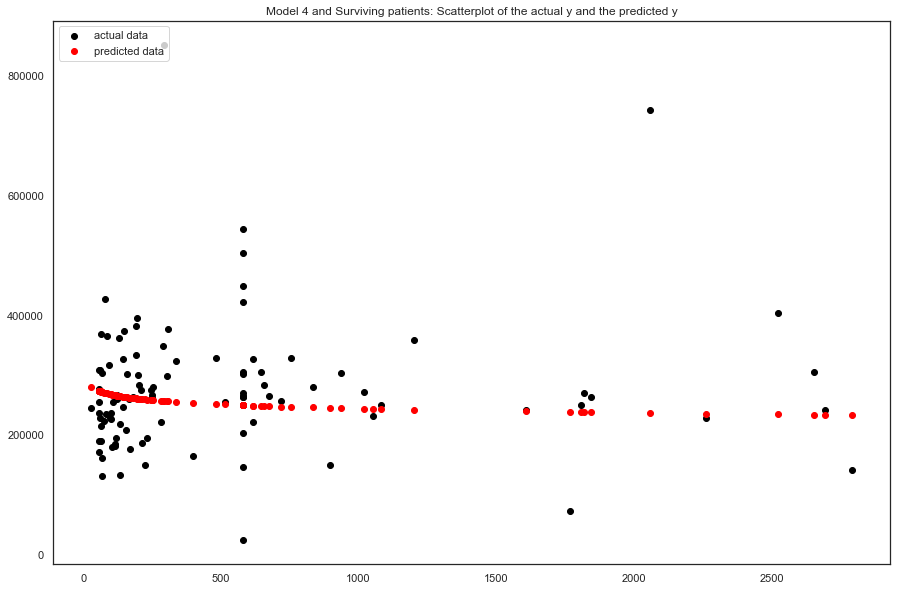

In [201]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X0_test, y0_test, color = 'black', label = 'actual data')
plt.scatter(X0_test, df_0_model4_predicted, color = 'red', label = 'predicted data')
plt.title("Model 4 and Surviving patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [202]:
# (e)
df_0_model4_loss = sum((y0_test-df_0_model4_predicted)**2)
print("The corresponding loss function is %.4lf" % df_0_model4_loss)

The corresponding loss function is 1328858922971.0068


Model 4 and deceased patients.

In [203]:
# (a)
df_1_model4 = LinearRegression().fit(np.array(np.log(X1_train)).reshape(-1,1), y1_train)

In [204]:
# (b)
print("The value for 'a' is %.4lf and 'b' is %.4lf." % (df_1_model4.coef_, df_1_model4.intercept_))

The value for 'a' is 7598.1561 and 'b' is 195622.4657.


In [205]:
# (c)
df_1_model4_predicted = df_1_model4.predict(np.array(np.log(X1_test)).reshape(-1,1))

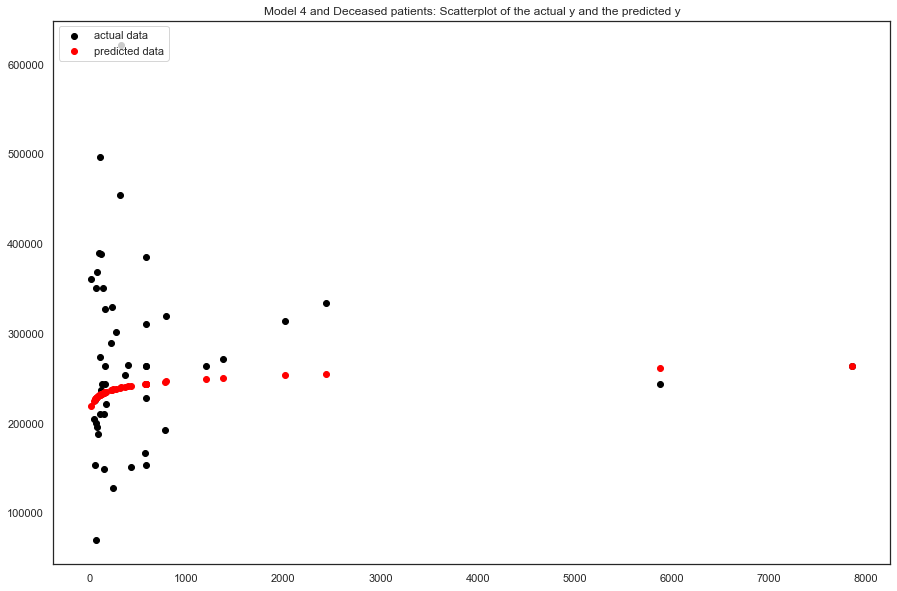

In [206]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X1_test, y1_test, color = 'black', label = 'actual data')
plt.scatter(X1_test, df_1_model4_predicted, color = 'red', label = 'predicted data')
plt.title("Model 4 and Deceased patients: Scatterplot of the actual y and the predicted y")
plt.legend(loc = "upper left")

In [207]:
# (e)
df_1_model4_loss = sum((y1_test-df_1_model4_predicted)**2)
print("The corresponding loss function is %.4lf" % df_1_model4_loss)

The corresponding loss function is 528654771964.3132


Model 5 and Surviving patients.

In [208]:
# (a)
df_0_model5 = LinearRegression().fit(np.array(np.log(X0_train)).reshape(-1,1), np.log(y0_train))

In [209]:
# (b)
print("The value for 'a' is %.4lf and 'b' is %.4lf." % (df_0_model5.coef_, df_0_model5.intercept_))

The value for 'a' is -0.0417 and 'b' is 12.6391.


In [210]:
# (c)
df_0_model5_predicted = df_0_model5.predict(np.array(np.log(X0_test)).reshape(-1,1))

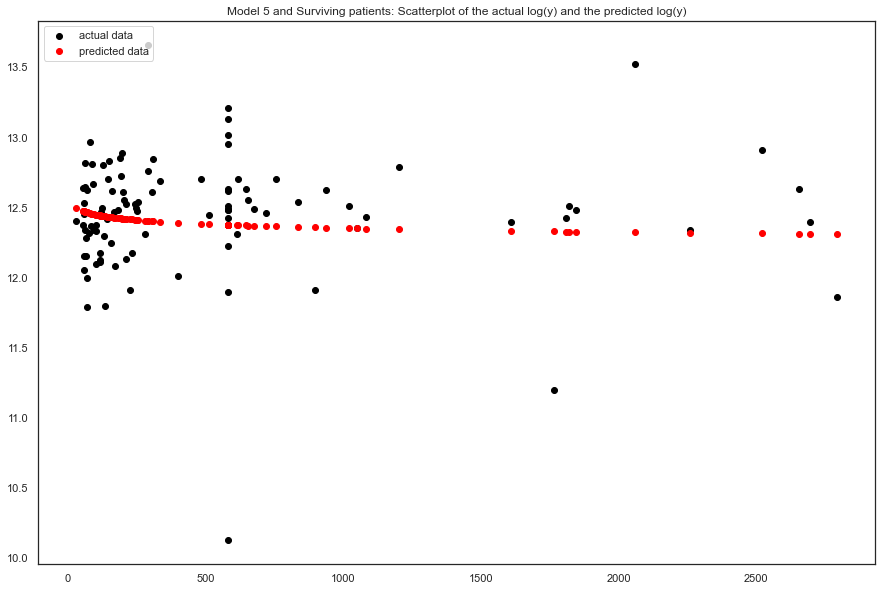

In [211]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X0_test, np.log(y0_test), color = 'black', label = 'actual data')
plt.scatter(X0_test, df_0_model5_predicted, color = 'red', label = 'predicted data')
plt.title("Model 5 and Surviving patients: Scatterplot of the actual log(y) and the predicted log(y)")
plt.legend(loc = "upper left")

In [212]:
# (e)
df_0_model5_loss = sum((np.log(y0_test)-df_0_model5_predicted)**2)
print("The corresponding loss function is %.4lf" % df_0_model5_loss)

The corresponding loss function is 18.2696


Model 5 and Deceased patients

In [213]:
# (a)
df_1_model5 = LinearRegression().fit(np.array(np.log(X1_train)).reshape(-1,1), np.log(y1_train))

In [214]:
# (b)
print("The value for 'a' is %.4lf and 'b' is %.4lf." % (df_1_model5.coef_, df_1_model5.intercept_))

The value for 'a' is 0.0155 and 'b' is 12.2019.


In [215]:
# (c)
df_1_model5_predicted = df_1_model5.predict(np.array(np.log(X1_test)).reshape(-1,1))

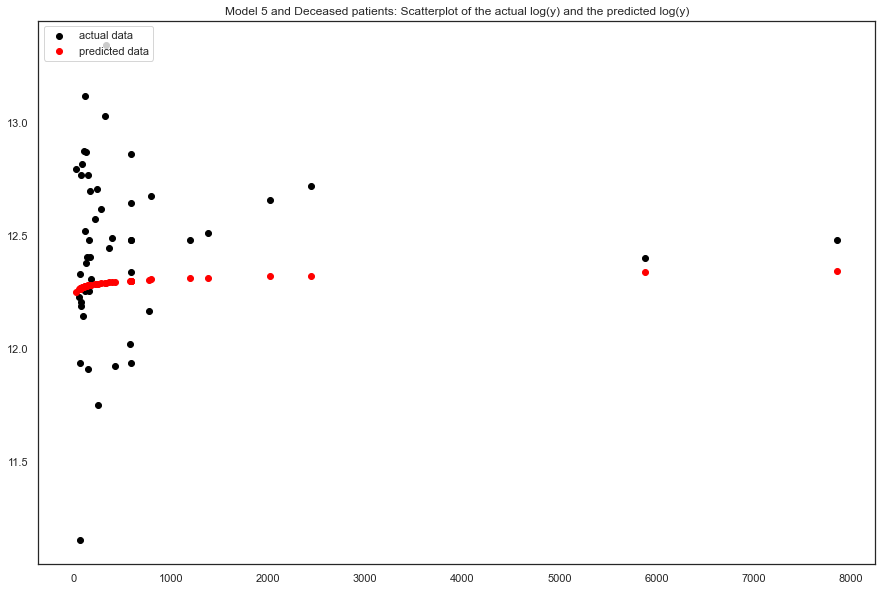

In [216]:
# (d)
plt.figure(figsize=(15,10))
plt.scatter(X1_test, np.log(y1_test), color = 'black', label = 'actual data')
plt.scatter(X1_test, df_1_model5_predicted, color = 'red', label = 'predicted data')
plt.title("Model 5 and Deceased patients: Scatterplot of the actual log(y) and the predicted log(y)")
plt.legend(loc = "upper left")

In [217]:
# (e)
df_1_model5_loss = sum((np.log(y1_test)-df_1_model5_predicted)**2)
print("The corresponding loss function is %.4lf" % df_1_model5_loss)

The corresponding loss function is 8.0399


### Question 3

| Model | SSE(death_event=0) | SSE(death_event=1) |
| --- | --- | --- |
| $$y=ax+b$$ | 1292865482231.553 | 542334440182.30414 | 
| $$y=ax^2+bx+c$$ | 1341597636786.2158 | 552029732256.2186 |
| $$y=ax^3+bx^2+cx+d$$ | 1343323330509.4695 | 552387274213.1921 | 
| $$y=a\log(x)+b$$ | 1328858922971.0068 | 528654771964.31323 |
| $$\log(y)=a\log(x)+b$$ | 18.2696 | 8.0399 |

### Question 3.1

For both surviving and deceased patients, Model 5 was the best (smallest SSE). 

### Question 3.2

For both surviving and deceased patients, model 3 is the worst (largest SSE).

## Questions from "data_science_assignment_trend_change_analysis.pdf"

### Question 1

In [229]:
XOM = pd.read_csv("XOM.csv")
XOM.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2016-01-04,2016,1,4,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,77.50,77.94,76.46,77.46,20400100.0,60.14,0.000000,60.1400,60.1400
1,2016-01-05,2016,1,5,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,77.19,78.14,76.92,78.12,11993500.0,60.65,0.008521,60.3950,60.3950
2,2016-01-06,2016,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,76.64,77.64,76.59,77.47,18826900.0,60.14,-0.008321,60.3100,60.3100
3,2016-01-07,2016,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,76.06,77.99,75.90,76.23,21263800.0,59.18,-0.016006,60.0275,60.0275
4,2016-01-08,2016,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,76.35,76.65,74.50,74.69,19033600.0,57.99,-0.020202,59.6200,59.6200


In [365]:
# function to detect change for each month
def change_detection(P, alpha = 0.1):
    n = len(P)
    T = np.array(list(range(1,len(P)+1))).reshape(-1,1)
    L1L2 = []
    for k in range(3, n-3+1):
        T1 = T[:k,:]
        T2 = T[(k+1):,:]
        P1 = P[:k]
        P2 = P[(k+1):]
        # regression for T1 period
        fit1 = LinearRegression().fit(T1, P1)
        L1 = sum((fit1.predict(T1)-P1)**2)
        # regression for T2 period
        fit2 = LinearRegression().fit(T2, P2)
        L2 = sum((fit1.predict(T2)-P2)**2)
        L1L2.append(L1+L2)
    # find the optimal break point to minimize L1+L2
    L1L2_min_index = L1L2.index(np.min(L1L2))
    k_opt = list(range(3, n-3+1))[L1L2_min_index]
    # using optimal break point, perform F-test
    T1 = T[:k_opt,:]
    T2 = T[(k_opt+1):,:]
    P1 = P[:k_opt]
    P2 = P[(k_opt+1):]
    fit1 = LinearRegression().fit(T1, P1)
    L1 = sum((fit1.predict(T1)-P1)**2)
    fit2 = LinearRegression().fit(T2, P2)
    L2 = sum((fit1.predict(T2)-P2)**2)
    # regression for T period
    fit0 = LinearRegression().fit(T, P)
    L = sum((fit0.predict(T)-P)**2)
    # calculate f-statistic
    f_statistics = ((L-(L1+L2))/2)/((L1+L2)/(n-4))
    # p-value
    p_value = 1-fisher_f.cdf(f_statistics, 2, n-4)
    if p_value > alpha:
        return k_opt, 'fail to reject', p_value
    else:
        return k_opt, 'reject', p_value

In [366]:
year = []
month = []
break_day = []
F_test_decision = []
p_values = []

In [367]:
for i in [2019,2020]:
    for j in range(1,13):
        P = np.array(XOM[(XOM['Year'] == i) & (XOM['Month'] == j)]['Adj Close'])
        k_opt, test_result, p_value = change_detection(P)
        year.append(i)
        month.append(j)
        break_day.append(k_opt)
        F_test_decision.append(test_result)
        p_values.append(p_value)

In [368]:
F_test_result = pd.DataFrame({'year':year, 'month':month, 'break_day':break_day,\
                              'F_test_decision':F_test_decision, 'p_value':p_values})

In [369]:
F_test_result

,year,month,break_day,F_test_decision,p_value
0,2019,1,17,fail to reject,0.553971
1,2019,2,12,fail to reject,0.476390
2,2019,3,18,fail to reject,0.779199
3,2019,4,15,fail to reject,0.192906
4,2019,5,19,fail to reject,1.000000
5,2019,6,14,fail to reject,0.260007
6,2019,7,19,fail to reject,0.901958
7,2019,8,15,fail to reject,0.573035
8,2019,9,17,fail to reject,1.000000
9,2019,10,16,fail to reject,0.709356


### Question 2

0 month exhibits significant price changes for XOM in 2019 and 2020. 

### Question 3

No. They are the same, no "change" in both years. 